# A deep learning approach for ECG-based heartbeat classification for arrhythmia detection

In [73]:
import matplotlib.pyplot as plt
import scipy
import wfdb

%matplotlib inline

In [74]:
wfdb.dl_database(db_dir="mitdb", dl_dir="mitdb")

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

In [75]:
num_of_samples_for_5min = 360 * 5 * 60
num_of_samples_for_10sec = 360 * 10
record_name = "mitdb/100"
ecg_record = wfdb.rdrecord(record_name=record_name,
              sampfrom=num_of_samples_for_5min,
              sampto=num_of_samples_for_5min+num_of_samples_for_10sec)
ecg_annotation = wfdb.rdann(record_name=record_name, extension="atr",
              sampfrom=num_of_samples_for_5min,
              sampto=num_of_samples_for_5min+num_of_samples_for_10sec,
              shift_samps=True)

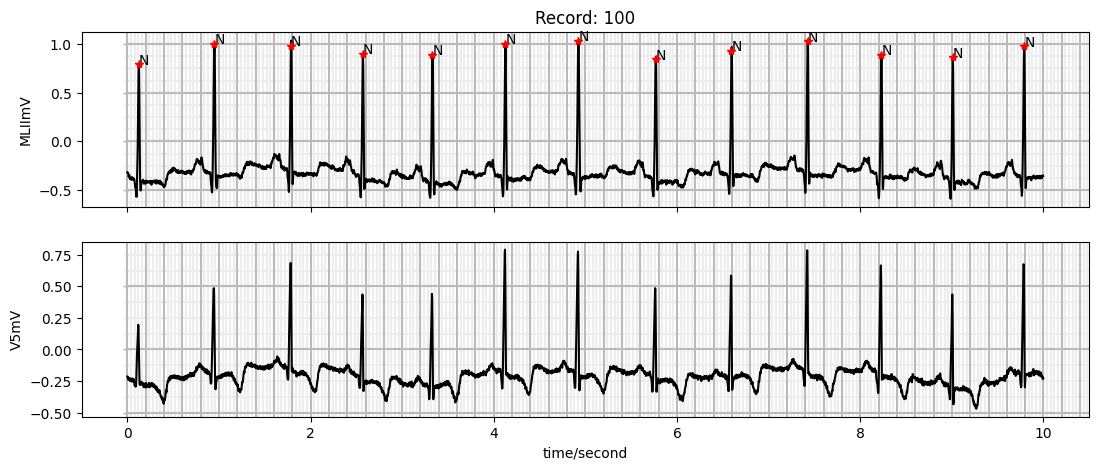

In [76]:
wfdb.plot_wfdb(record=ecg_record,
               annotation=ecg_annotation,
               figsize=(13, 5),
               time_units="seconds",
               ecg_grids="all",
               plot_sym=True,
               sig_style=["k-", "k-"])

In [77]:
signal, info = wfdb.io.rdsamp(record_name=record_name,
               sampfrom=num_of_samples_for_5min,
               sampto=num_of_samples_for_5min + num_of_samples_for_10sec)

In [78]:
0.6 * 350

210.0

In [79]:
# sampling freq = 350 Hz, 0.2 s = 200 ms (sampling duration)
filter_kernel_size_200ms = 71 # (0.2 * 350) + 1 (one is added to make it odd)
filter_kernel_size_600ms = 211 # (0.6 * 350) + 1 (one is added to make it odd )
filtered_signal_200ms = scipy.signal.medfilt(signal[:, 0],
                                         kernel_size=filter_kernel_size_200ms)
filtered_signal_600ms = scipy.signal.medfilt(filtered_signal_200ms,
                                             kernel_size=filter_kernel_size_600ms)
baseline_subtracted = signal[:, 0] - filtered_signal_600ms

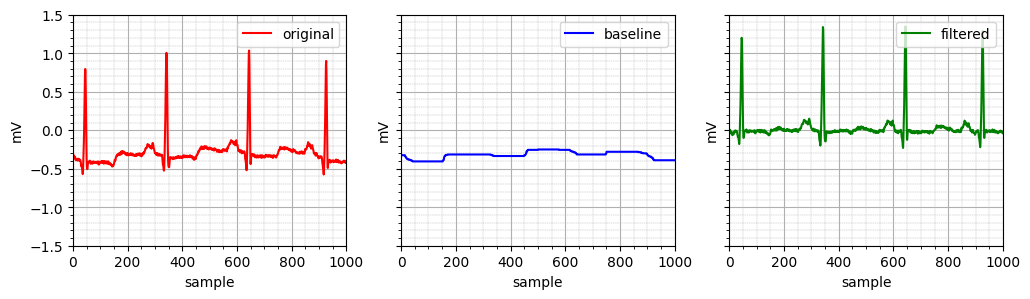

In [80]:
signals = [signal[:, 0], filtered_signal_600ms, baseline_subtracted]
labels = ["original", "baseline", "filtered"]
linestyles = ["-", '-', '-']
colors = ["red", "blue", "green"]
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for ax, sig, label, linestyle, color in zip(axes.flatten(), signals,labels,linestyles,colors) :
  ax.plot(sig, label=label, linestyle=linestyle, color=color)
  ax.grid(which="major")
  ax.minorticks_on()
  ax.grid(which="minor", linewidth=0.3, linestyle="--")
  ax.legend(loc="upper right")
  ax.set_ylim([-1.5, 1.5])
  ax.set_xlim([0, 1000])
  ax.set_xlabel("sample")
  ax.set_ylabel("mV")

In [81]:
sample_rate = 350
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = scipy.signal.kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 35

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = scipy.signal.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_signal = scipy.signal.lfilter(taps, 1.0, baseline_subtracted)

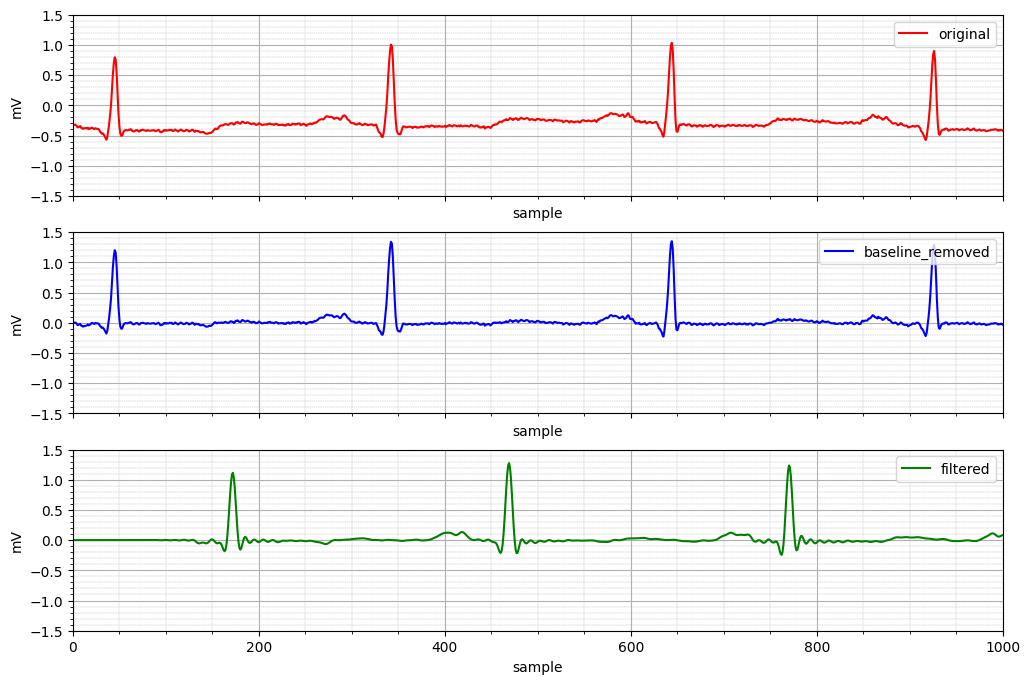

In [85]:
signals = [signal[:, 0], baseline_subtracted, filtered_signal]
labels = ["original", "baseline_removed", "filtered"]
linestyles = ["-", '-', '-']
colors = ["red", "blue", "green"]
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
for ax, sig, label, linestyle, color in zip(axes.flatten(), signals,labels,linestyles,colors) :
  ax.plot(sig, label=label, linestyle=linestyle, color=color)
  ax.grid(which="major")
  ax.minorticks_on()
  ax.grid(which="minor", linewidth=0.3, linestyle="--")
  ax.legend(loc="upper right")
  ax.set_ylim([-1.5, 1.5])
  ax.set_xlim([0, 1000])
  ax.set_xlabel("sample")
  ax.set_ylabel("mV")

## Resources

- Original Paper - https://www.sciencedirect.com/science/article/pii/S0167739X17324548?casa_token=VA3Pv9qqrogAAAAA:YbAYqiDGy785wc9Ic9y2RL4HYDy1UW82YxEtsJyuapNbCNDfwmtMiunBrhtIxBShCgAO2syS

In [82]:
150/350

0.42857142857142855